***2. Support vector machine.***

*As you did with the Perceptron, use the Iris data set, but this time use
features 0 and 2, and labels 1,2.*

In [3]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data
y = iris.target

print("size of x", x.shape)
print("size of y", y.shape)


x = x[:,[0,2]]
idxs = np.where((y==1) | (y==2))
x = x[idxs]
y = y[idxs]
y[y==2] = -1

print("size of x", x.shape)
print("size of y", y.shape)


size of x (150, 4)
size of y (150,)
size of x (100, 2)
size of y (100,)


*(a) Is this data linearly separable?*

*(b) Use sklearn.svm.SVC to fit a support vector machine classifier to the data. You will need to
invoke the option kernel=’linear’. Try at least 10 different values of the slack parameter C. In
your writeup, include a table that shows these values of C and for each of them gives the training
error and the number of support vectors.*

In [2]:
from sklearn.svm import SVC
C=0.0001
header = "{:<10} {:<15} {:<10}".format('C', 'training error', '# support vectors')
print(header)
print('-' * len(header))
for i in range(10):
    #C = 0.1
    svc = SVC(C=C, kernel="linear")
    svc.fit(x,y)
    svc.support_vectors_
    predictions = svc.predict(x)
    err_predictions = np.not_equal(y,predictions)
    training_error = float(np.sum(err_predictions))/len(y)
    num_support_vectors = len(svc.support_vectors_)
    print ("{:<10} {:<15} {:<10}".format(C, training_error, num_support_vectors))
    C *= 10
print('-' * len(header))

C          training error  # support vectors
--------------------------------------------
0.0001     0.17            100       
0.001      0.17            100       
0.01       0.16            92        
0.1        0.07            56        
1.0        0.07            32        
10.0       0.05            18        
100.0      0.05            14        
1000.0     0.05            14        
10000.0    0.05            14        
100000.0   0.06            14        
--------------------------------------------


Cross Validation: Using 5-fold cross validation to choose the best value of C.

In [3]:
from sklearn.model_selection import KFold
C=0.0001
kf = KFold(n_splits=5, random_state=42, shuffle=True)
print("Number of splits",kf.get_n_splits(x))

header = "{:<10} {:<20} {:<10}".format('C', 'CV_training_error', 'CV_test_error')
print('-' * len(header))
print(header)
print('-' * len(header))
for i in range(10):
    training_error_for_folds = []
    test_error_for_folds = []
    for train_index, test_index in kf.split(x):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        svc = SVC(C=C, kernel="linear")
        svc.fit(X_train,y_train)
        train_predictions = svc.predict(X_train)
        test_predictions = svc.predict(X_test)
        train_err_predictions = np.not_equal(y_train,train_predictions)
        test_err_predictions = np.not_equal(y_test,test_predictions)
        training_error_for_folds.append(float(np.sum(train_err_predictions))/len(y_train))
        test_error_for_folds.append(float(np.sum(test_err_predictions))/len(y_test))
    print ("{:<10} {:<20} {:<10}".format(C, round(np.average(training_error_for_folds),2), round(np.average(test_error_for_folds),2)))
    C *= 10
print('-' * len(header))

Number of splits 5
---------------------------------------------
C          CV_training_error    CV_test_error
---------------------------------------------
0.0001     0.46                 0.64      
0.001      0.46                 0.64      
0.01       0.22                 0.32      
0.1        0.08                 0.08      
1.0        0.06                 0.05      
10.0       0.05                 0.07      
100.0      0.05                 0.07      
1000.0     0.05                 0.08      
10000.0    0.05                 0.08      
100000.0   0.05                 0.07      
---------------------------------------------


*(c) Which value of C do you think is best? For this value, include a plot of the data points and the
linear decision boundary.*

Answer: C = 1 gives the least cross validation error of 0.05. Hence using that as best value of C.

In [4]:
#Since the error seems yp be lowest for C = 1. Picking that for the final decison boundary plot
C = 1
svc = SVC(C=C, kernel="linear")
svc.fit(x,y)
w = svc.coef_
b = svc.intercept_

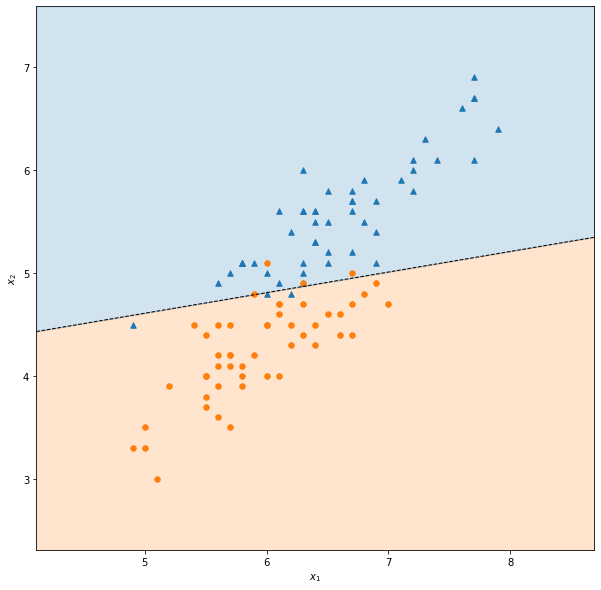

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
plt.figure(figsize=(10, 10))

w1,w2 = w.T
#print("coefficients: ",w1, w2)
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

# Plot the data and the classification with the decision boundary.

#This is to keep the scale of the graph to show all points getting min and max 
x_buffer = max(x[:,0])/10
y_buffer = max(x[:,1])/10
xmin,ymin = min(x[:,0])-x_buffer, min(x[:,1])-y_buffer
xmax,ymax = max(x[:,0])+x_buffer, max(x[:,1])+y_buffer

xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:orange', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:blue', alpha=0.2)

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ylabel(r'$x_2$')
plt.xlabel(r'$x_1$')


plt.scatter(*x[y==-1].T, s=30, marker="^", alpha=1)
plt.scatter(*x[y==1].T, s=30, marker="o", alpha=1)
plt.show()